# Filtro pasabajos pasivo de segundo orden
<img src="./logo_UTN.svg" align="right" width="150" /> 

Por Mariano Llamedo Soria

### Introducción

Comencemos con un ejemplo simple: un pasabajos de 2do orden pasivo como seguramente habrás visto en TC1:

![lpf_pasivo.jpg](lpf_pasivo.jpg)

es decir, la transferencia de tensión del circuito definida de la forma

\begin{equation}
H(s) = \frac{V_2}{V_1} = \frac{R(s)}{E(s)} = \frac{\frac{1}{LC}}{s^2 + s. \frac{1}{RC} + \frac{1}{LC}}
\end{equation}

se comporta como filtro pasabajos de 2do orden.

Entonces se entiende como **sección de segundo orden** (SOS por sus siglas en inglés) a un sistema lineal cuya transferencia $H(s)$ está definida por un cociente de polinomios, $E$ y $R$ en este caso, y al menos el denominador $E$ sea  de **segundo orden**. Para el caso concreto de un filtro pasabajo como el que se analiza, la función transferencia está definida por un polinomio denominador de segundo orden, y un numerador definido por una constante, es decir de orden 0. Para los polinomios de segundo orden se adoptará

* que sean *mónicos*, es decir el coeficiente de mayor orden valga 1.
* y los demás coeficientes se definirán en función de los parámetros $\omega_0$ y $Q$,

que se explican a continuación. Sea un polinomio 

$$ P(s) = a.s^2 + b.s + c, $$

se prefiere presentarlo como 

$$ P(s) = a.( s^2 + \frac{b}{a}.s + \frac{c}{a}) $$

ó ya parametrizado 

$$ P(s) = a.( s^2 +  \frac{\omega_0}{Q} . s + \omega_0^2) $$

 donde $\omega_0^2 = \frac{c}{a}$ y $Q = \sqrt{\frac{a.c}{b^2}}$. Esta parametrización tiene gran utilidad dado que $\omega_0$ es la pulsación natural de oscilación del circuito resonante, y $Q$ es el valor que tiene la transferencia H(s) para $s = j\omega_0$. Como $Q$ *por lo general* es mayor a $\frac{\sqrt{2}}{2}$, también se interpreta a $Q$ como el realce del filtro, en el contexto de un filtro pasabajos (o pasa-altos).

Las SOS son de gran utilidad, dado que junto con las funciones transferencia de primer orden permiten implementar sistemas de orden arbitrariamente grande. Es decir que un sistema de orden arbitrario puede representarse como una factorización (o cascada) de tantos SOS como corresponda y, eventualmente, si el orden fuera impar, de un sistema de primer orden. Volviendo a las SOS's tenemos que la transferencia desnormalizada $H_d(s)$ será

$$ H_d(s) = \frac{k.\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}. $$

 Luego adoptando como norma de frecuencia $\omega_0$, es decir haciendo $H(s) = H_d(s)\Big\vert_{s = s.\omega_0}
 $ obtenemos la versión normalizada en frecuencia

$$ H(s) = \frac{k}{s^2+s\frac{1}{Q}+1} $$

quedando como único parámetro $Q$, dado que ahora $\omega_0 = 1$. Para quien lea esta explicación y le interese el tema, podría analizar qué valores de L y C aseguran que el filtro pasabajo pasivo tenga una transferencia normalizada


Hecha esta introducción teórica realizaremos los gráficos de la respuesta en frecuencia de módulo y fase para $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$, junto con el diagrama de polos y ceros.


In [1]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías externas


In [2]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq


In [3]:
# Comienzo de la simulación

Q = np.sqrt(2)/2
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
display(H1)

TransferFunctionContinuous(
array([1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

Como se puede observar, luego de cargar el objeto *TransferFunction*, no es fácil volver a identificar los parámetros $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$ que lo originaron. Para ello se utilizará una función creada para tal fin de poder manifestar dicha parametrización:

\begin{equation}
H_d(s) = \frac{1 . \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}


In [4]:
pretty_print_bicuad_omegayq(num,den)


<IPython.core.display.Math object>

De esta manera la comparación visual se ve facilitada. Continuando con el análisis

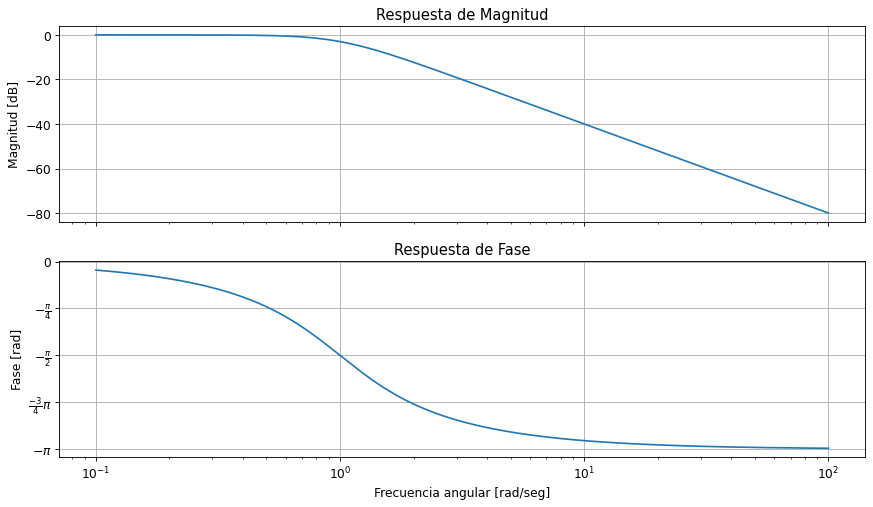

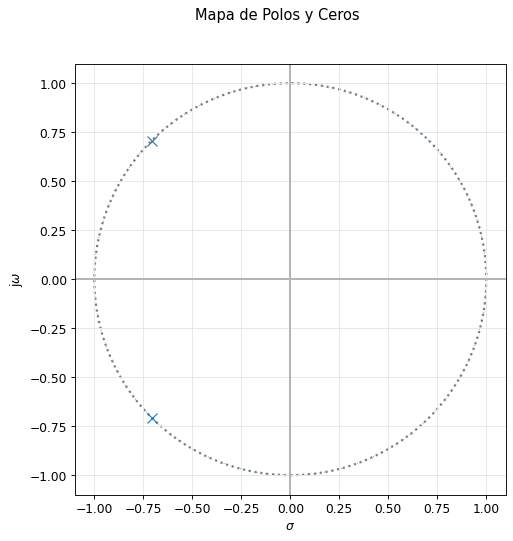

In [7]:
_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])

_= pzmap(H1)

# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.
# analyze_sys(H1, sys_name='mi ejemplo')



otra manera de llegar al mismo resultado, con un poco más de detalle es a través de la función *analyze_sys*

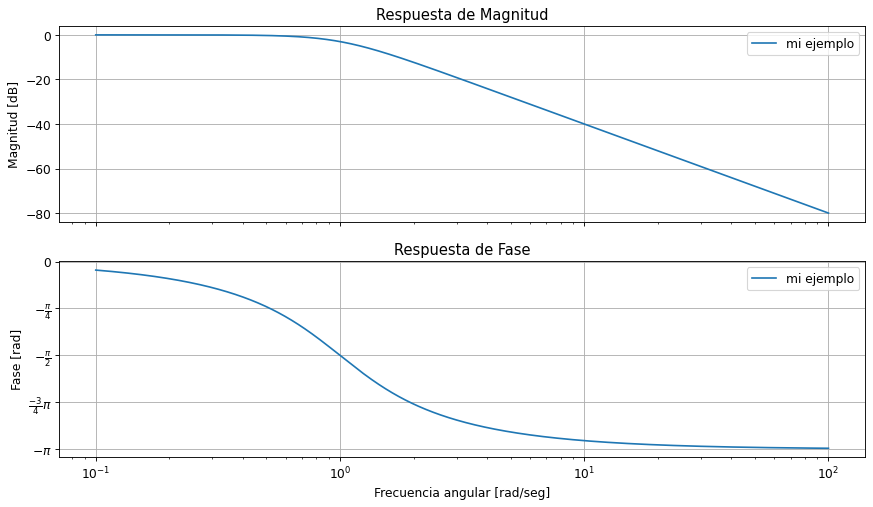

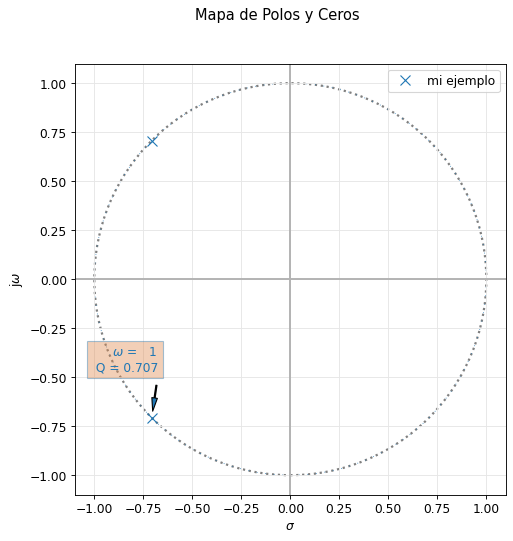

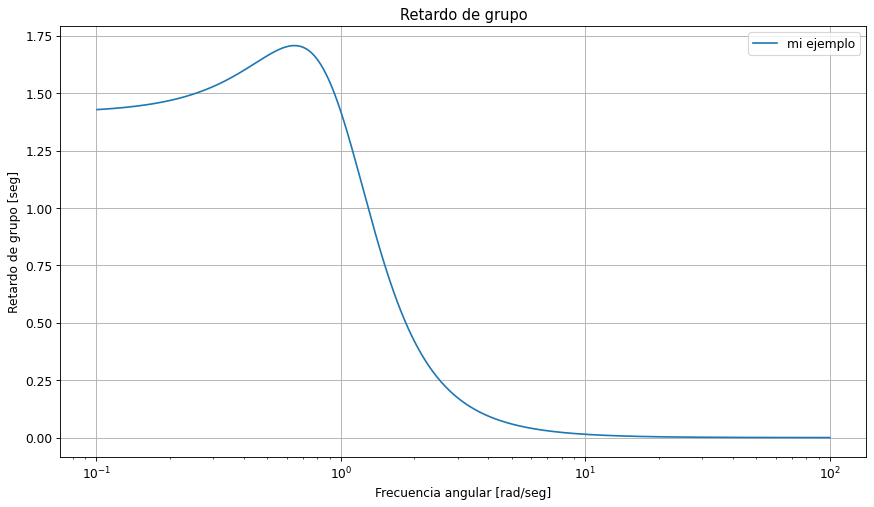

In [8]:
# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.

_= analyze_sys(H1, sys_name='mi ejemplo')


ciertamente *analyze_sys* extiende el análisis de la respuesta en frecuencia al calcular el *retardo de grupo*; como también incorpora información al *diagrama de polos y ceros*, acerca del  $\omega_0$ y $Q$ asociado a cada SOS, o par de polos complejos conjugados.